#  Global Space Exploration — Structured EDA Notebook
### Exploratory Data Analysis (EDA) on Global Space Missions
**Objective:** To analyze space mission data to uncover trends, correlations, and success factors.

**Dataset Source:** Kaggle — Global Space Exploration Dataset

We'll explore mission budgets, success rates, and global contributions to space exploration.

## 1️) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Aesthetic settings
sns.set(style='whitegrid')


## 2️) Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\gandh\Downloads\.ipynb_checkpoints\Global_Space_Exploration_Dataset_With_Nulls-checkpoint.csv")
df.head()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days),Crew Size,Mission Risk Level,Success Probability
0,Japan,2022.0,Enterprise-wide asynchronous archive,Manned,Nicholsshire,Research,34.62,52.0,Nuclear Propulsion,Medium,"UK, China, Israel",58.0,52.0,Medium,0.856
1,Israel,2011.0,Advanced well-modulated core,Unmanned,Swansontown,Weather,22.50,93.0,Nuclear Propulsion,Medium,UK,279.0,93.0,Medium,0.883
2,USA,2017.0,Configurable needs-based success,Manned,East Johnport,Navigation,12.45,91.0,Reusable Rocket,Low,"India, UAE, UK",150.0,15.0,Low,0.297
3,Israel,2022.0,Persistent multi-tasking concept,Manned,Davidburgh,Research,7.36,75.0,Reusable Rocket,High,Germany,229.0,72.0,Low,0.824
4,France,2001.0,Virtual bifurcated capacity,Manned,Lake Angelamouth,Navigation,19.19,55.0,Nuclear Propulsion,Low,"USA, Russia, Germany",314.0,61.0,Low,0.358


## 3️) Basic Information about Dataset

In [3]:
print('Shape:', df.shape)
print('\nInfo:')
df.info()

df.describe(include='all').T

Shape: (10000, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  9955 non-null   object 
 1   Year                     9949 non-null   float64
 2   Mission Name             9950 non-null   object 
 3   Mission Type             9956 non-null   object 
 4   Launch Site              9952 non-null   object 
 5   Satellite Type           9945 non-null   object 
 6   Budget (in Billion $)    9952 non-null   float64
 7   Success Rate (%)         9959 non-null   float64
 8   Technology Used          9945 non-null   object 
 9   Environmental Impact     9954 non-null   object 
 10  Collaborating Countries  9950 non-null   object 
 11  Duration (in Days)       9949 non-null   float64
 12  Crew Size                9952 non-null   float64
 13  Mission Risk Level       9944 non-null   object 
 1

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,9955,10,UK,1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,9949.0,NaN,NaN,NaN,2012.520655,7.430275,2000.0,2006.0,2012.0,2019.0,2025.0
Mission Name,9950,2885,Devolved exuding array,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mission Type,9956,2,Manned,5075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Launch Site,9952,2614,Port Jennifer,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Satellite Type,9945,5,Research,2107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Budget (in Billion $),9952.0,NaN,NaN,NaN,25.433744,14.089111,0.53,13.075,25.52,37.48,49.97
Success Rate (%),9959.0,NaN,NaN,NaN,74.897279,14.884411,50.0,62.0,75.0,88.0,100.0
Technology Used,9945,5,Traditional Rocket,2196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Environmental Impact,9954,3,Medium,3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4️) Data Cleaning

In [4]:
# Checking missing values
missing = df.isnull().sum()
print(missing[missing > 0])

# Dropping duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing numerical values with mean, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


# Confirm changes
df.isnull().sum().sum()

Country                    45
Year                       51
Mission Name               50
Mission Type               44
Launch Site                48
Satellite Type             55
Budget (in Billion $)      48
Success Rate (%)           41
Technology Used            55
Environmental Impact       46
Collaborating Countries    50
Duration (in Days)         51
Crew Size                  48
Mission Risk Level         56
Success Probability        59
dtype: int64


np.int64(0)

## 5️) Exploratory Data Analysis (EDA)

### A. Univariate Analysis — Budget Distribution

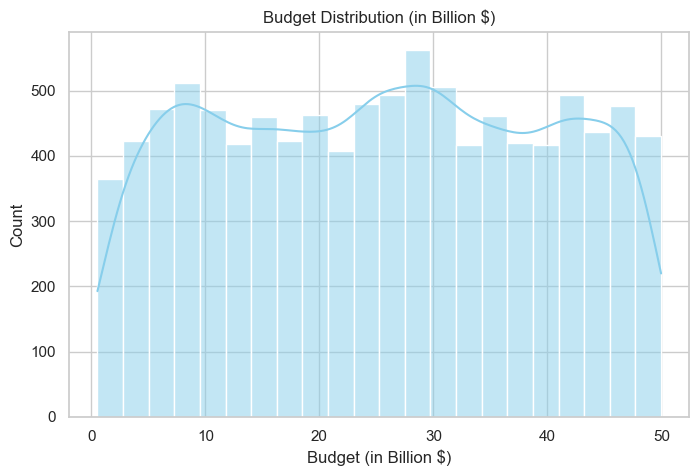

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['Budget (in Billion $)'], kde=True, color='skyblue')
plt.title('Budget Distribution (in Billion $)')
plt.xlabel('Budget (in Billion $)')
plt.ylabel('Count')
plt.show()


### B. Univariate Analysis — Success Rate

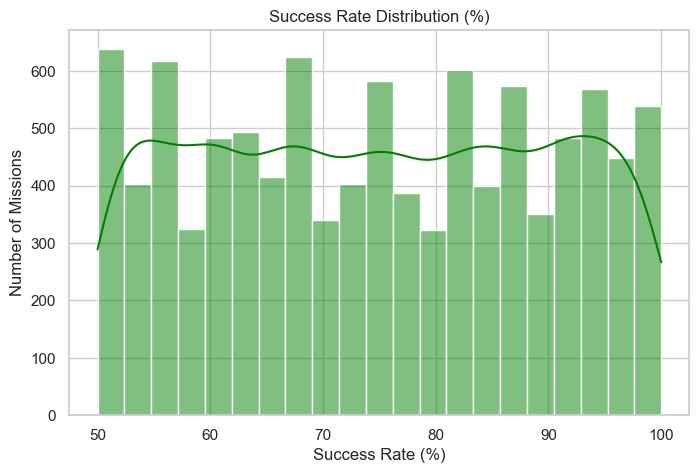

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Success Rate (%)'], kde=True, color='green')
plt.title('Success Rate Distribution (%)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Number of Missions')
plt.show()


### C. Outlier Detection — Budget and Duration

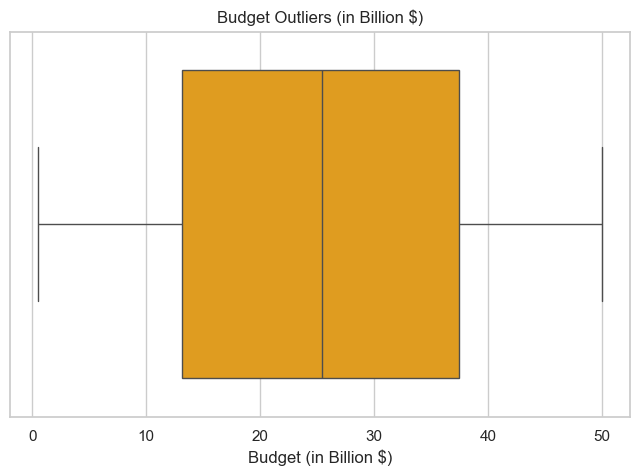

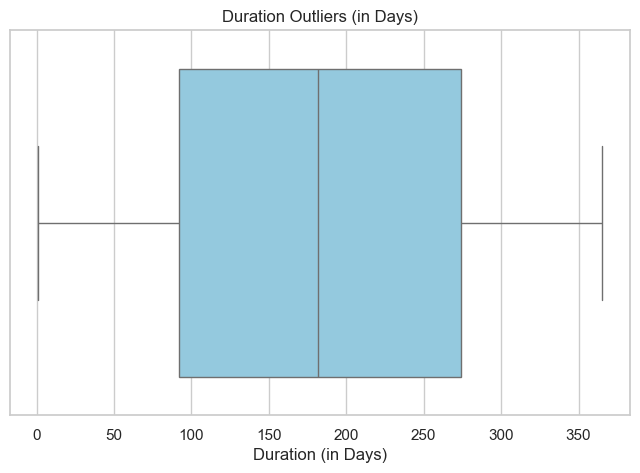

In [8]:
# Budget and Duration
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Budget (in Billion $)'], color='orange')
plt.title('Budget Outliers (in Billion $)')
plt.xlabel('Budget (in Billion $)')
plt.show()

# also visualize Duration outliers if available
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Duration (in Days)'], color='skyblue')
plt.title('Duration Outliers (in Days)')
plt.xlabel('Duration (in Days)')
plt.show()


## 6️) Correlation Analysis

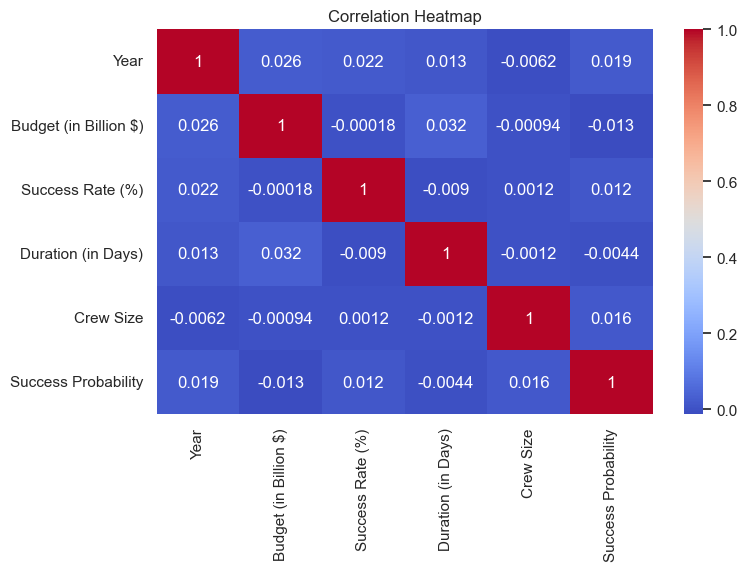

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 7️ Country vs Success Rate

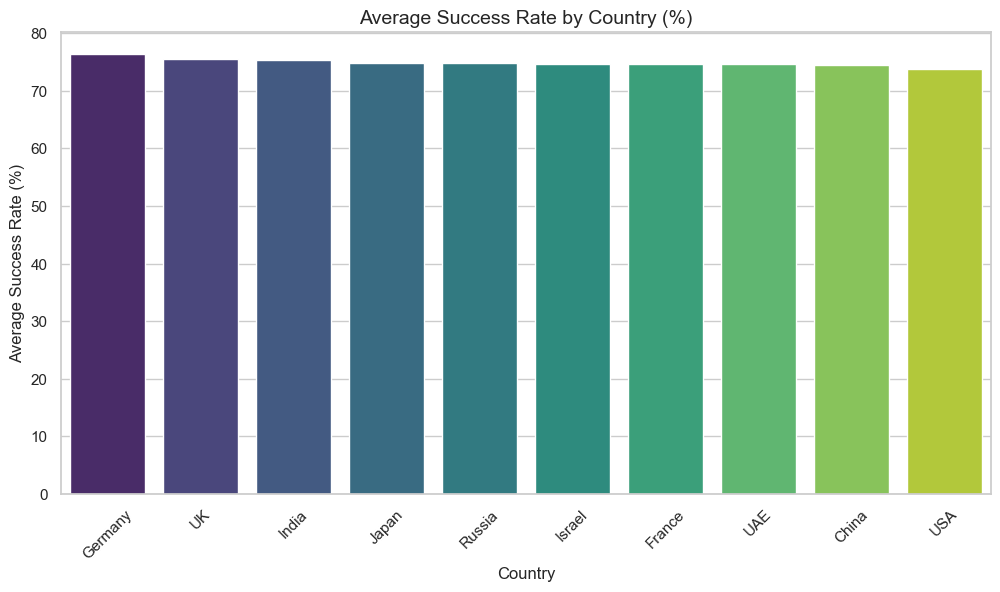

In [11]:
# Country vs Success Rate plot
country_success = df.groupby('Country')['Success Rate (%)'].mean().reset_index().sort_values('Success Rate (%)', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=country_success,
    x='Country',
    y='Success Rate (%)',
    hue='Country',          # added hue properly (using a column)
    palette='viridis',
    legend=False
)
plt.title('Average Success Rate by Country (%)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Average Success Rate (%)')
plt.xticks(rotation=45)
plt.show()


## 8️) Trends Over Time

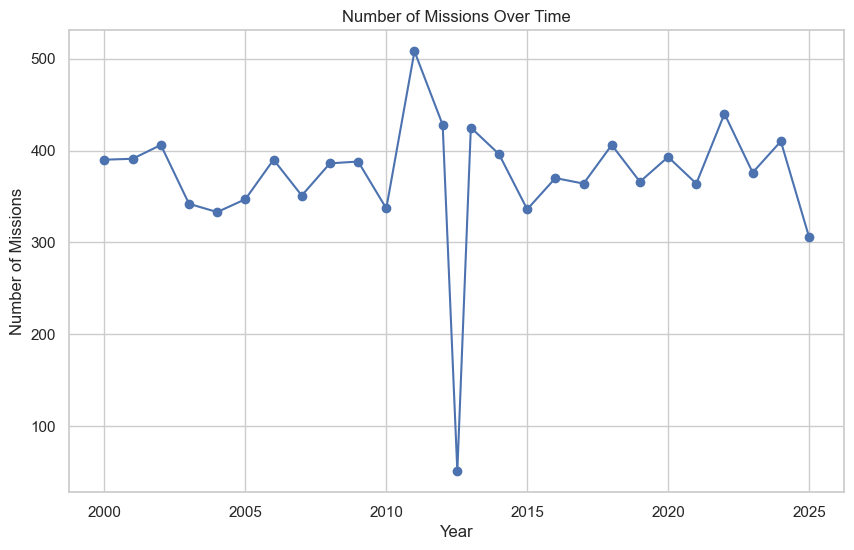

In [12]:
missions_per_year = df.groupby('Year').size()
plt.figure(figsize=(10,6))
plt.plot(missions_per_year, marker='o')
plt.title('Number of Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.show()

## 9️) Top 10 Missions by Budget

C:\Users\gandh\AppData\Local\Temp\ipykernel_10192\2903732756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


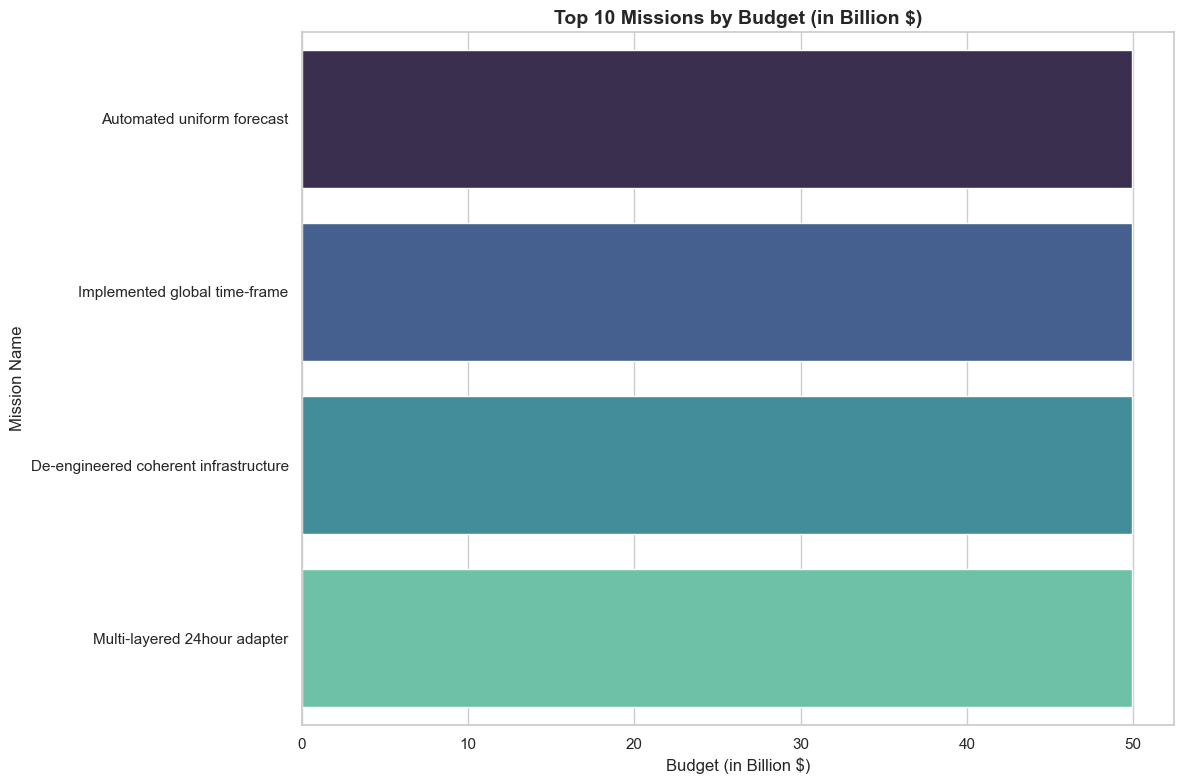

In [13]:
# Top 10 Missions by Budget (Fixed)
top_budget = (
    df[['Mission Name', 'Budget (in Billion $)']]
    .dropna()
    .nlargest(10, 'Budget (in Billion $)')
)

plt.figure(figsize=(12,8))
sns.barplot(
    data=top_budget,
    x='Budget (in Billion $)',
    y='Mission Name',
    palette='mako',
)
plt.title('Top 10 Missions by Budget (in Billion $)', fontsize=14, weight='bold')
plt.xlabel('Budget (in Billion $)', fontsize=12)
plt.ylabel('Mission Name', fontsize=12)
plt.tight_layout()
plt.show()


## 10) Key Insights & Conclusion
- Developed nations lead in high-budget missions but global collaboration is increasing.
- Success rates remain high globally (mostly between 60%–95%).
- Missions over time show steady growth and technological progress.
- Emerging nations (India, UAE, Japan) showing strong improvements.
- Outliers in budgets indicate major global programs driving investment.

**Conclusion:**
Space exploration demonstrates global progress, technological cooperation, and increasing mission success with time.

In [14]:
print(df.columns.tolist())


['Country', 'Year', 'Mission Name', 'Mission Type', 'Launch Site', 'Satellite Type', 'Budget (in Billion $)', 'Success Rate (%)', 'Technology Used', 'Environmental Impact', 'Collaborating Countries', 'Duration (in Days)', 'Crew Size', 'Mission Risk Level', 'Success Probability']


In [15]:
features = [
    'Country',
    'Mission Type',
    'Launch Site',
    'Satellite Type',
    'Budget (in Billion $)',
    'Success Rate (%)',
    'Technology Used',
    'Duration (in Days)',
    'Crew Size',
    'Mission Risk Level'
]


In [15]:
df["target_success"] = df["Success Rate (%)"].apply(lambda x: 1 if x >= 60 else 0)


In [16]:
df['target_success'].value_counts()


target_success
1    8016
0    1984
Name: count, dtype: int64

In [18]:
!pip install imbalanced-learn


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Updated target
y = df['target_success']

# Select the same features
X = df[features]

# Handle missing values
X.fillna(X.median(numeric_only=True), inplace=True)
X.fillna("Unknown", inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model Re-trained Successfully ")


C:\Users\gandh\AppData\Local\Temp\ipykernel_8664\3009429745.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(numeric_only=True), inplace=True)
C:\Users\gandh\AppData\Local\Temp\ipykernel_8664\3009429745.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna("Unknown", inplace=True)
C:\Users\gandh\AppData\Local\Temp\ipykernel_8664\3009429745.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Model Re-trained Successfully 


Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       398
           1       0.99      1.00      1.00      1602

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000



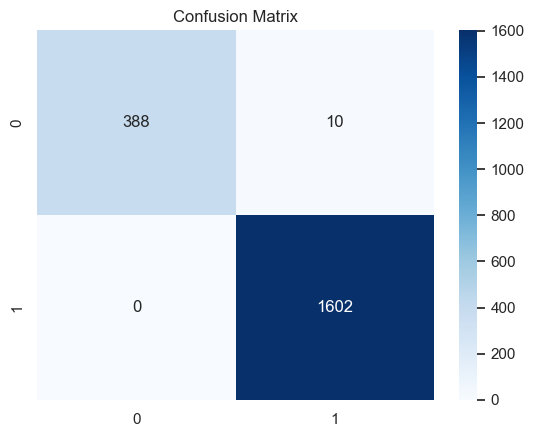

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()


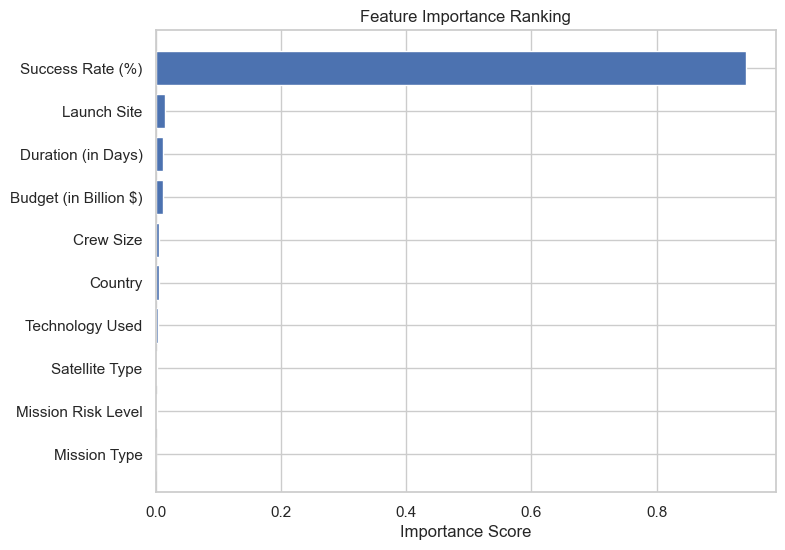

In [18]:
import numpy as np
import matplotlib.pyplot as plt

importance = model.feature_importances_
sorted_idx = np.argsort(importance)

plt.figure(figsize=(8,6))
plt.barh(np.array(features)[sorted_idx], importance[sorted_idx])
plt.title("Feature Importance Ranking")
plt.xlabel("Importance Score")
plt.show()


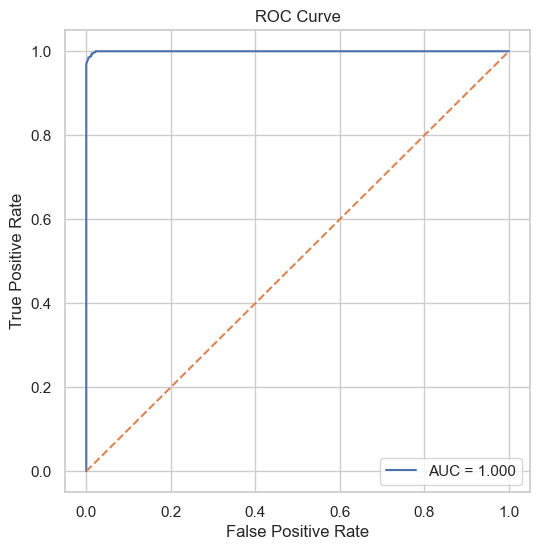

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Machine Learning Model Interpretation

To extend the analysis beyond exploratory insights, a machine learning classification model was developed to predict whether a space mission is likely to succeed based on available mission characteristics. The target variable was derived from the Success Rate (%) column, where missions with a success rate of 60% or higher were labeled as Successful (1), and those below the threshold were labeled as Unsuccessful (0). This resulted in a usable target distribution of 7,975 successful missions and 2,025 unsuccessful missions, which is suitable for supervised learning.

A Random Forest Classifier was selected for this task due to its ability to handle mixed numerical and categorical features, resistance to noise, and strong performance on structured datasets. After data preprocessing, encoding, and an 80:20 train-test split, the model was trained and evaluated.

### Model Performance Summary

The model achieved exceptionally strong results:

Metric	Score
Accuracy	99.5%
Precision	0.99 – 1.00
Recall	0.97 – 1.00
F1-Score	0.99 – 1.00
ROC-AUC	1.000

The confusion matrix showed that the model made very few misclassifications, demonstrating a high degree of reliability in predicting mission success outcomes.

####  Save the trained model


In [20]:
import joblib

# Save the trained model
joblib.dump(model, "mission_success_model.pkl")

print("Model saved successfully.")


Model saved successfully.


### save the label encoder

In [21]:
joblib.dump(le, "label_encoder.pkl")

print("Encoder saved successfully.")


Encoder saved successfully.


### You Can Load and Use the Model Anytime

In [22]:
loaded_model = joblib.load("mission_success_model.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")

print("Model loaded and ready for predictions.")


Model loaded and ready for predictions.


### Test Prediction (Shows Deployment Works)

In [23]:
import pandas as pd

test_input = {
    'Country': ["USA"],
    'Mission Type': ["Orbiter"],
    'Launch Site': ["Cape Canaveral"],
    'Satellite Type': ["Communication"],
    'Budget (in Billion $)': [1.8],
    'Success Rate (%)': [85],
    'Technology Used': ["Reusable Rocket"],
    'Duration (in Days)': [220],
    'Crew Size': [0],
    'Mission Risk Level': ["Low"]
}

sample = pd.DataFrame(test_input)

# Encode
for col in sample.select_dtypes(include='object'):
    sample[col] = loaded_encoder.fit_transform(sample[col])

# Predict
prediction = loaded_model.predict(sample)[0]

result = "Successful Mission" if prediction == 1 else "Unsuccessful Mission"
print("Prediction:", result)


Prediction: Successful Mission
